# Student Performance Prediction

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
df.head(5)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [4]:
df.shape

(6607, 20)

In [5]:
df.shape

(6607, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [13]:
df.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

In [15]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [17]:
categorical_columns_with_missing = ['Parental_Education_Level', 'Distance_from_Home', 'Teacher_Quality']

for column in categorical_columns_with_missing:
    mode_value = df[column].mode()[0]  
    df[column].fillna(mode_value, inplace=True)
df.sample(5)


Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
5597             18          71               Medium                High   
3127             28          66                 High              Medium   
5712             25          72               Medium              Medium   
3137             14          94               Medium              Medium   
2528             32          84               Medium                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
5597                        Yes            6               81   
3127                        Yes            9               73   
5712                         No            6               86   
3137                         No            5               51   
2528                        Yes           10               68   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
5597           Medium             Yes                  1           Low   
3127           Medium             Yes                  2           Low   
5712             High             Yes                  0        Medium   
3137           Medium             Yes                  0        Medium   
2528           Medium             Yes                  1           Low   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
5597            High      Public       Positive                  3   
3127          Medium      Public       Positive                  2   
5712          Medium      Public        Neutral                  2   
3137            High      Public        Neutral                  3   
2528          Medium      Public       Positive                  5   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
5597                    No              High School               Near   
3127                    No                  College               Near   
5712                    No              High School                Far   
3137                    No                  College               Near   
2528                    No              High School               Near   

      Gender  Exam_Score  
5597    Male          66  
3127    Male          68  
5712  Female          66  
3137    Male          66  
2528    Male          73

In [19]:
df.duplicated().sum()

0

In [21]:
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

## Data Visualization

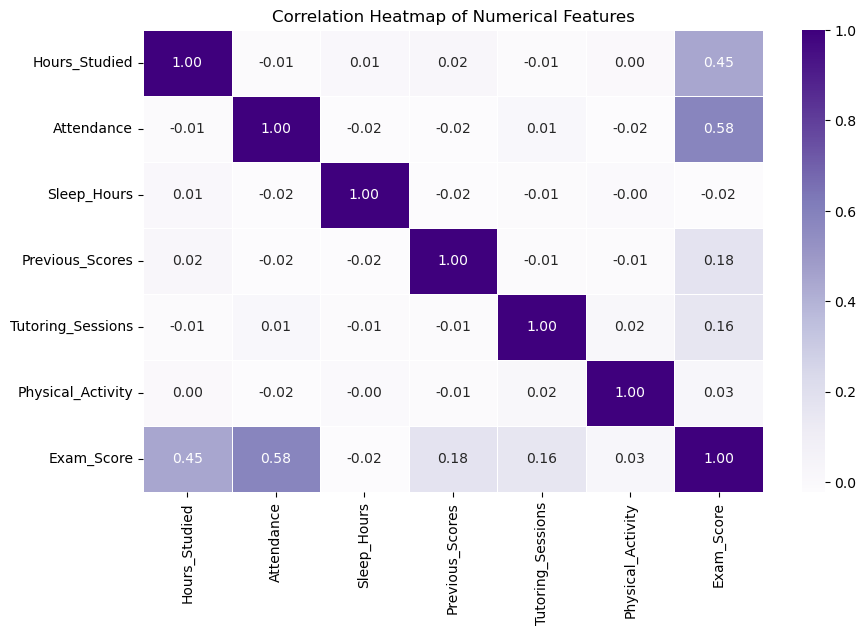

In [24]:
# Correlation Heatmap for numerical features

numerical_features = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']]
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

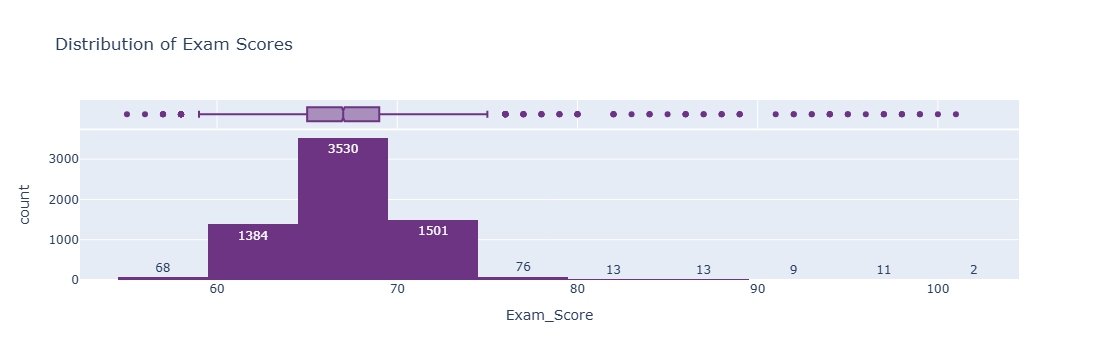

In [26]:
# Histogram for Exam Score

fig = px.histogram(
    data_frame=df,
    x='Exam_Score', 
    nbins=20, 
    marginal='box', 
    color_discrete_sequence=['#6c3483'], 
    text_auto=True,
    title='Distribution of Exam Scores'
)

fig.show()

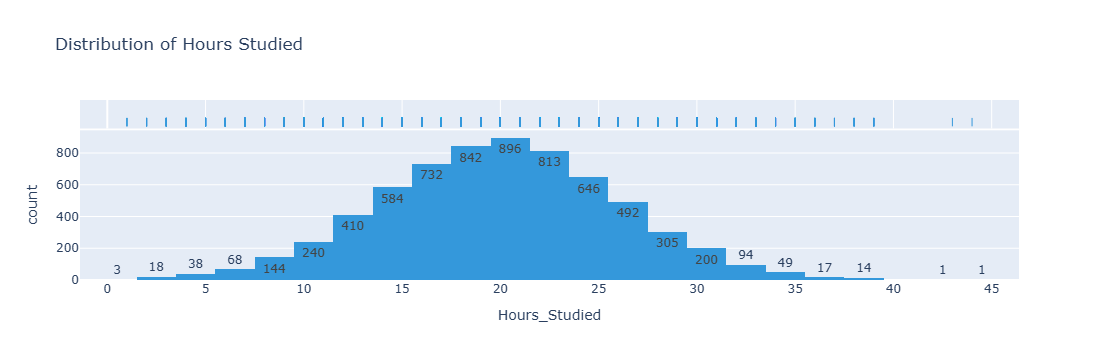

In [27]:
# Histogram for Hours Studied

fig = px.histogram(
    data_frame=df,
    x='Hours_Studied', 
    nbins=25, 
    marginal='rug', 
    color_discrete_sequence=['#3498db'], 
    text_auto=True, 
    title='Distribution of Hours Studied'
)

fig.show()


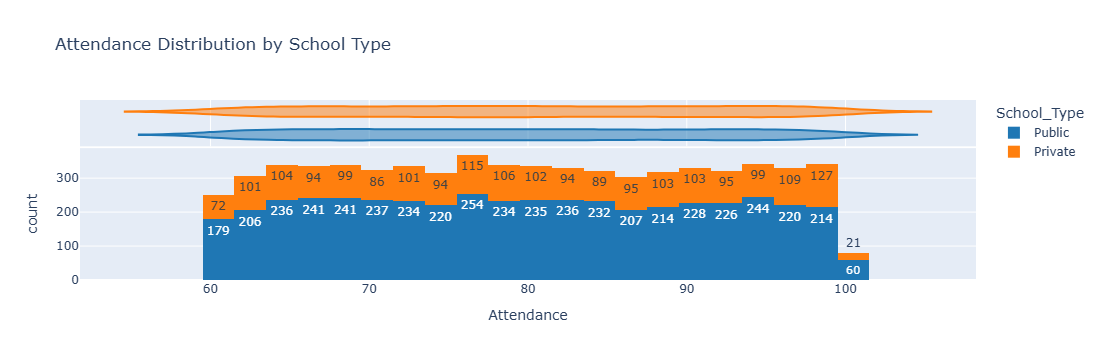

In [29]:
#  Histogram for Attendance

fig = px.histogram(
    data_frame=df,
    x='Attendance', 
    nbins=30, 
    marginal='violin',  
    color='School_Type', 
    color_discrete_sequence=['#1f77b4', '#ff7f0e'], 
    text_auto=True,  
    title='Attendance Distribution by School Type' 
)

fig.show()


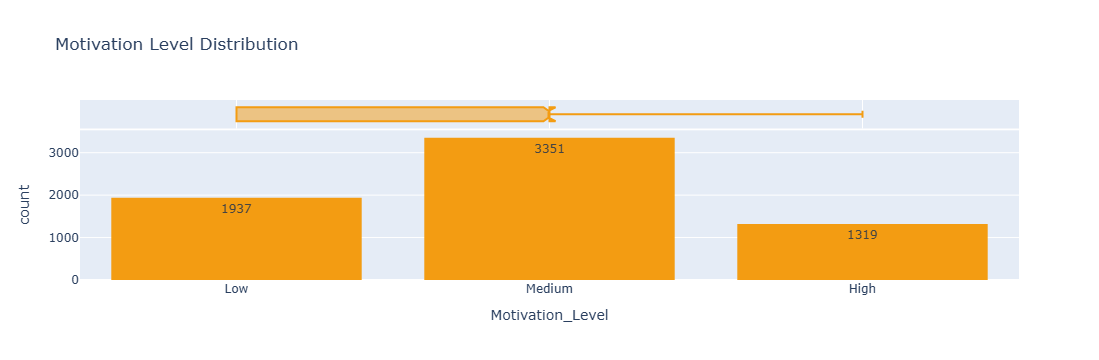

In [32]:
# Histogram for Motivation Level

fig = px.histogram(
    data_frame=df,
    x='Motivation_Level', 
    nbins=10,  
    marginal='box',  
    color_discrete_sequence=['#f39c12'],
    text_auto=True,  
    title='Motivation Level Distribution'
)

fig.show()


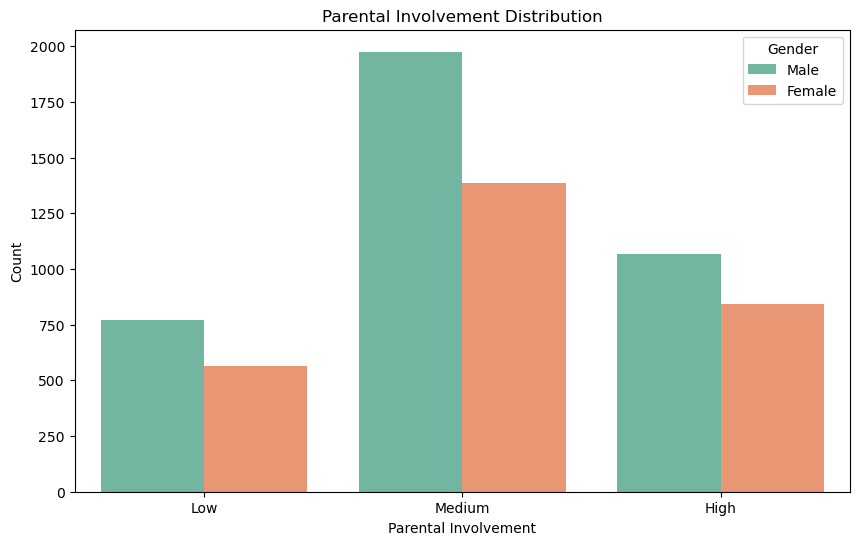

In [34]:
# Bar Plot for categorical features

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Parental_Involvement', hue='Gender', palette='Set2')
plt.title('Parental Involvement Distribution')
plt.xlabel('Parental Involvement')
plt.ylabel('Count')
plt.show()

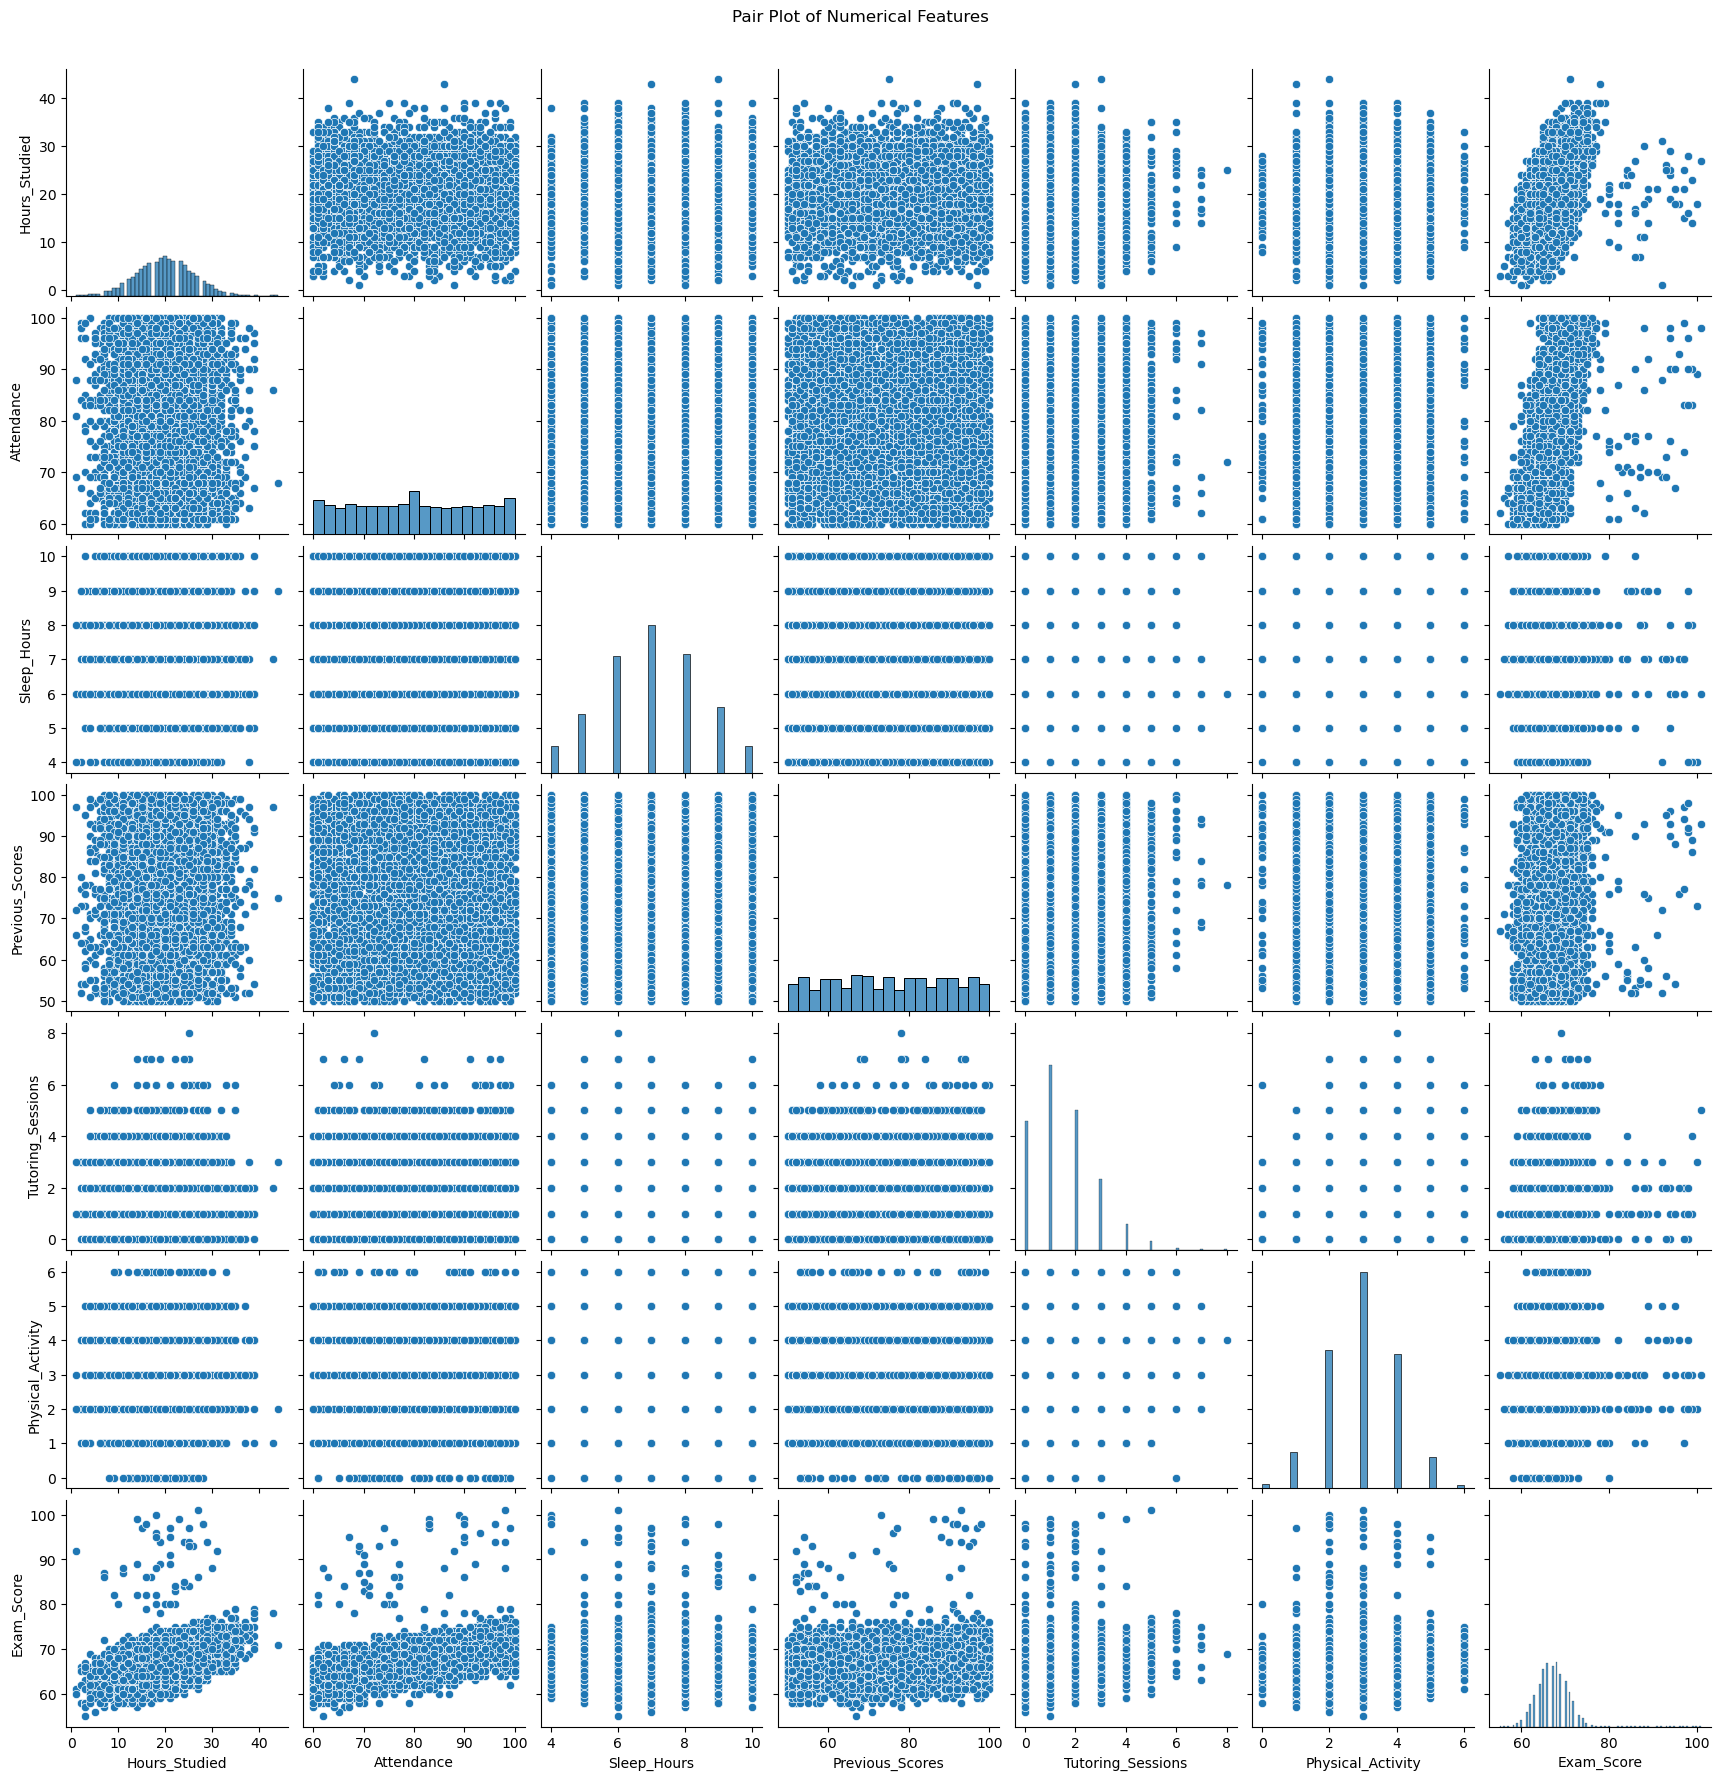

In [36]:
# Pair Plot for relationships between numerical variables

sns.pairplot(numerical_features)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

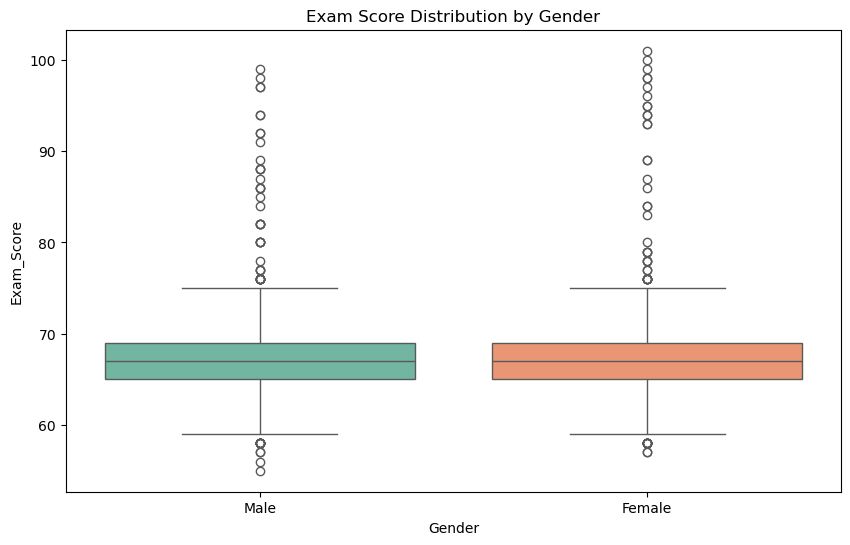

In [37]:
# Box Plot to compare Exam Score distribution across Gender

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Exam_Score', palette='Set2')
plt.title('Exam Score Distribution by Gender')
plt.show()

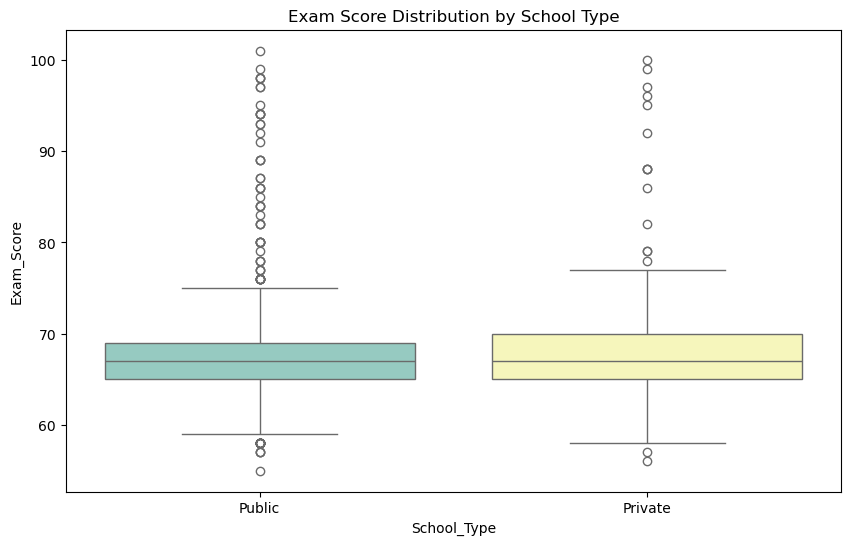

In [38]:
# Box Plot for Exam Scores Based on School Type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='School_Type', y='Exam_Score', palette='Set3')
plt.title('Exam Score Distribution by School Type')
plt.show()

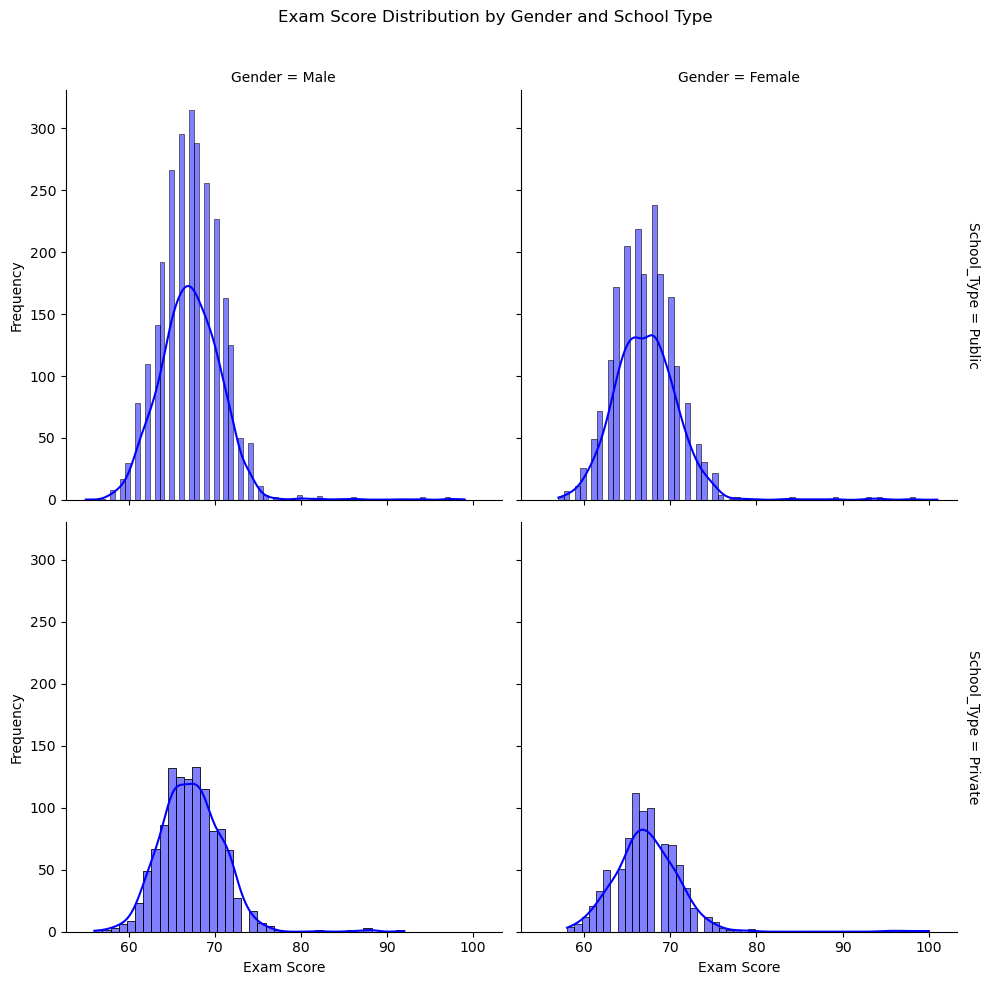

In [39]:
#  FacetGrid for Multiple Categorical Variables

g = sns.FacetGrid(df, col="Gender", row="School_Type", margin_titles=True, height=5)
g.map(sns.histplot, "Exam_Score", kde=True, color="blue")
g.set_axis_labels('Exam Score', 'Frequency')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Exam Score Distribution by Gender and School Type')
plt.show()


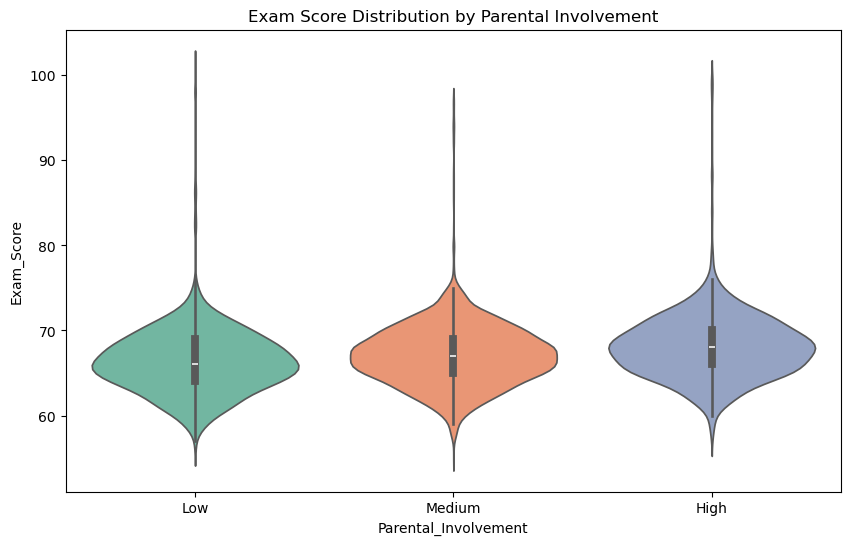

In [40]:
#  Violin Plot to Show Distribution of Exam Scores by Parental_Involvement

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Parental_Involvement', y='Exam_Score', palette='Set2')
plt.title('Exam Score Distribution by Parental Involvement')
plt.show()

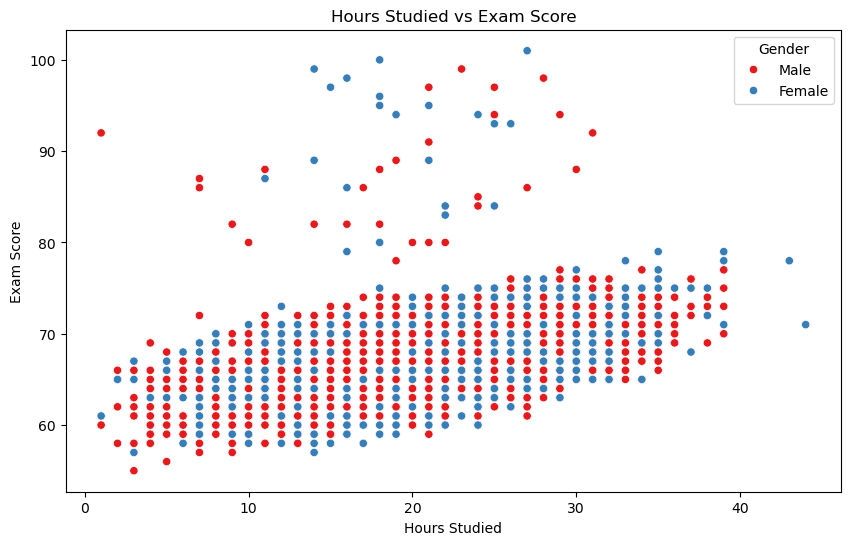

In [44]:
# Scatter Plot for Hours Studied vs Exam Score

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', hue='Gender', palette='Set1')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

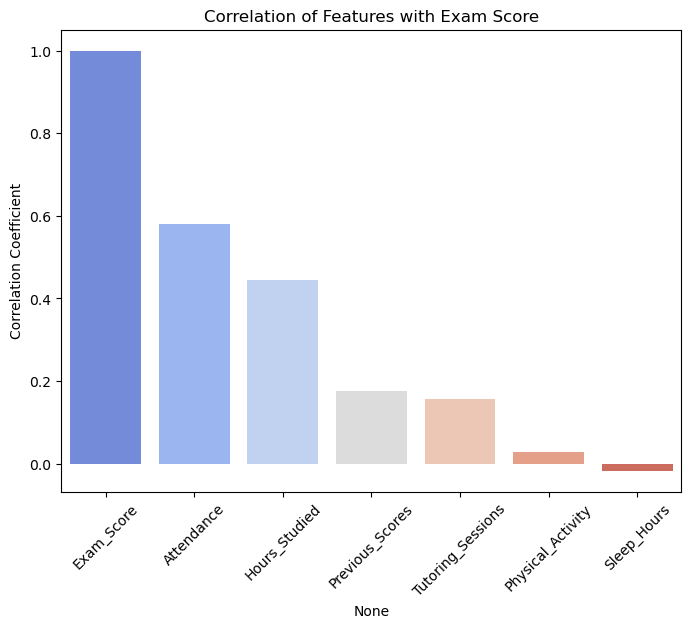

In [48]:
# correlation with Exam_Score

correlation_with_target = numerical_features.corr()['Exam_Score'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with Exam Score')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

## One Hot Encoding

In [51]:
categorical_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
    'Motivation_Level', 'Internet_Access', 'Family_Income','Teacher_Quality', 'School_Type', 
    'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level','Distance_from_Home','Gender'
]

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.sample(5)

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
2943             19          89           10               74   
1333             29          89            8               89   
3392             20          89            8               52   
3943              6          98            8               75   
776              16          94            7               76   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
2943                  1                  2          66   
1333                  1                  4          71   
3392                  2                  3          69   
3943                  1                  3          64   
776                   2                  3          67   

      Parental_Involvement_Low  Parental_Involvement_Medium  \
2943                     False                         True   
1333                     False                         True   
3392                     False                        False   
3943                     False                         True   
776                      False                         True   

      Access_to_Resources_Low  ...  Teacher_Quality_Medium  \
2943                     True  ...                    True   
1333                     True  ...                   False   
3392                    False  ...                    True   
3943                     True  ...                    True   
776                     False  ...                    True   

      School_Type_Public  Peer_Influence_Neutral  Peer_Influence_Positive  \
2943                True                   False                     True   
1333               False                    True                    False   
3392                True                   False                    False   
3943                True                    True                    False   
776                 True                    True                    False   

      Learning_Disabilities_Yes  Parental_Education_Level_High School  \
2943                      False                                  True   
1333                      False                                  True   
3392                      False                                 False   
3943                       True                                 False   
776                        True                                  True   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Moderate  \
2943                                  False                         True   
1333                                  False                         True   
3392                                  False                         True   
3943                                   True                        False   
776                                   False                        False   

      Distance_from_Home_Near  Gender_Male  
2943                    False        False  
1333                    False         True  
3392                    False        False  
3943                    False        False  
776                      True        False  

[5 rows x 28 columns]

## Train Test And Split

In [54]:
z = np.abs((df - df.mean()) / df.std())
threshold = 3
df= df[(z < threshold).all(axis=1)]

In [56]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
lf = LinearRegression()

lf.fit(X_train, y_train)

LinearRegression()

In [65]:
lf_pred = lf.predict(X_test)
lf_r2 = r2_score(y_test, lf_pred)

print(f"R2 Score = {lf_r2}")

R2 Score = 0.9894221634929541


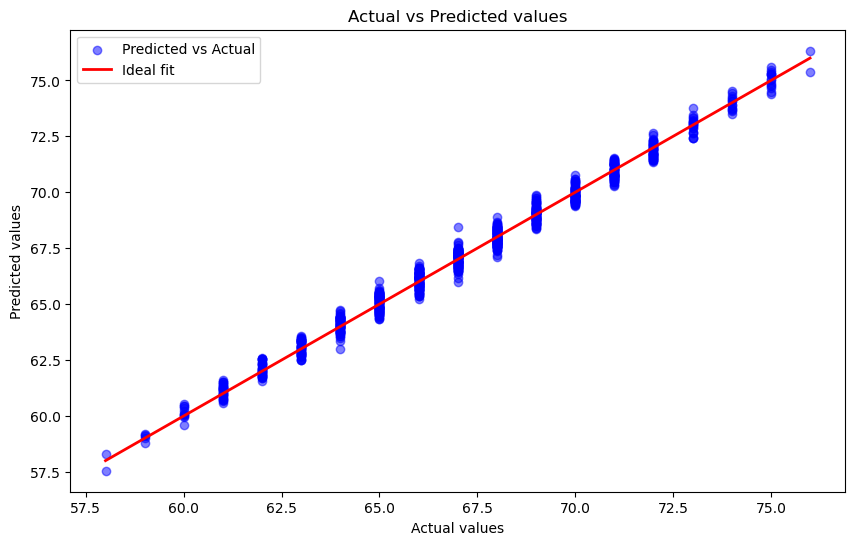

In [67]:
# Plot for Actual vs Predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lf_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

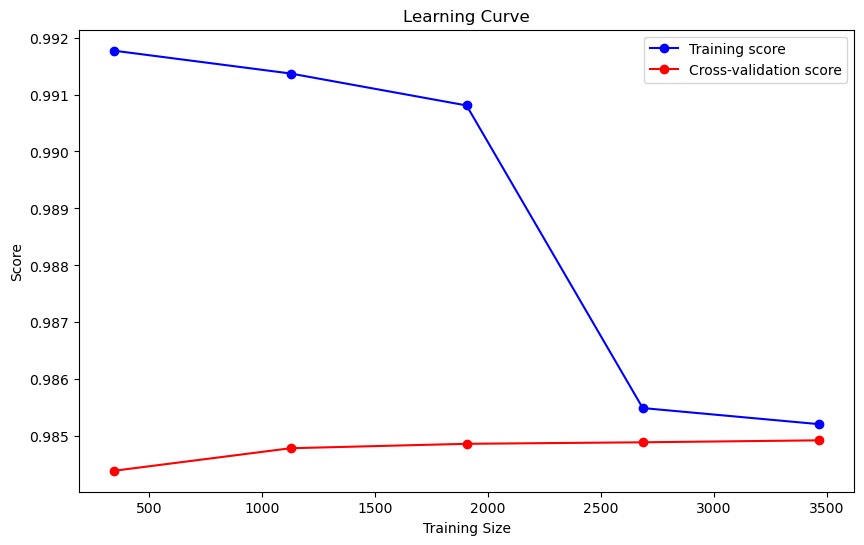

In [69]:
# Plot for learning curve

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(lf, X_train, y_train, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score', color='blue', marker='o')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score', color='red', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [70]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': lf_pred})
print(comparison_df.head(10))

      Actual  Predicted
353       64  63.697923
2111      60  59.962330
5169      63  63.022636
2282      68  67.367322
1306      67  66.774153
3705      64  63.912229
6555      67  66.826496
359       63  63.058994
2321      67  67.223449
1877      66  66.577728
